In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tcn import compiled_tcn

def data_generator():
    # input image dimensions
    img_rows, img_cols = 28, 28
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape )
    x_train = x_train.reshape(-1, img_rows * img_cols, 1)
    x_test = x_test.reshape(-1, img_rows * img_cols, 1)
    print(x_train.shape )

    num_classes = 10
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    y_train = np.expand_dims(y_train, axis=2)
    y_test = np.expand_dims(y_test, axis=2)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    return (x_train, y_train), (x_test, y_test)


if __name__ == '__main__':
#     print(data_generator())
    (x_train, y_train), (x_test, y_test) = data_generator()
    print(x_train.shape, y_train.shape)
    


(60000, 28, 28)
(60000, 784, 1)
(60000, 784, 1) (60000, 10, 1)


In [ ]:
if __name__ == '__main__':
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=x_train[0:1].shape[1],
                         use_weight_norm=True,
                         use_skip_connections=True)

    print(f'x_train.shape = {x_train.shape}')
    print(f'y_train.shape = {y_train.shape}')
    print(f'x_test.shape = {x_test.shape}')
    print(f'y_test.shape = {y_test.shape}')

    model.summary()

    model.fit(x_train, y_train.squeeze().argmax(axis=1), epochs=100,
              validation_data=(x_test, y_test.squeeze().argmax(axis=1)))


In [ ]:

# numFeature = 3
# numActions = 5
# dataset_columns = numFeature + numActions

# def create_dataset(train_subjects):
#     train_x = np.zeros((0, numFeature))
#     train_y = np.zeros((0, numActions))
#     test_x = np.zeros((0, numFeature))
#     test_y = np.zeros((0, numActions))    
    
#     trainSet = None
#     testSet = None
    
#     for dirpath, foldername, files in os.walk(datasetDir):
#         for filename in files:
#             if "lpf_" in filename:
#                 subname = dirpath.split("\\")[2] 
#                 csvFile = os.path.join(dirpath, filename)
#                 timestamp, pelvis_x, pelvis_y, pelvis_z, actionList = getPelvisData(csvFile) 
                
#                 pelvisData = np.array([pelvis_x, pelvis_y, pelvis_z]).T
#                 actionData = np.array(actionList)
#                 #dataset = tf.data.Dataset.from_tensor_slices( (pelvisData.astype('float32'), actionData.astype('float32')) ) 
#                 dataset = np.zeros( (len(pelvisData), dataset_columns) ) 
                
#                 dataset[:, :-(numActions)] = pelvisData      # time , pelvis  넣음  (317,4) -- raw data 
#                 dataset[:, -(numActions): ] = actionData     # (335, 5) one hot encoding 수행한 actionsList
                
#                # print(np.array(dataset).shape)
                
#                 if subname in train_subjects:
#                     train_x = np.append(train_x, pelvisData, axis = 0 )
#                     train_y = np.append(train_y, actionData, axis = 0 )

#                 else:
#                     test_x = np.append(test_x, pelvisData, axis = 0 )
#                     test_y = np.append(test_y, actionData, axis = 0 )    

#     return train_x, train_y, test_x, test_y


# # ---------------  1. subject 별로 dataset 분할 (K-fold 정함) ------------------------------------------------------#
# Kfold_num = 0 # if kfold_num = 0 (arbitrary train/test set will be used)
# train_Fold, test_Fold = trainData_split(datasetDir,train_ratio = 0.7, shuffle = False, Kfold_num = Kfold_num)  

# # ---------------  2. dataset 생성  train_x, train_y, test_x, test_y  (k-fold 면 앞에 KFold_ 붙음) -----------------#
# if Kfold_num == 0:  
#     train_x, train_y, test_x, test_y = create_dataset(train_Fold)
#     print("\n Train Shape X , Y: {0} , {1} \t Test Shape X , Y: {2} , {3}".format(train_x.shape, train_y.shape, test_x.shape, test_y.shape))
    
    
    
    
# else:      # -- K-fold dataset
#     print("\n\n -------------------- K-Fold Dataset ------------------------ ")
#     KFold_train_x = []
#     KFold_train_y =[]
#     KFold_test_x = []
#     KFold_test_y = []
#     for i in range(Kfold_num):
#         train_x, train_y, test_x, test_y = create_dataset(train_Fold[i])
#         KFold_train_x.append(train_x)
#         KFold_train_y.append( train_y)
#         KFold_test_x.append( test_x )
#         KFold_test_y.append( test_y )
#         print(" \t Train (X,Y): {0} , {1} \t Test (X,Y): {2} , {3}".format(train_x.shape, train_y.shape, test_x.shape, test_y.shape))
        
#     for i in range(Kfold_num):
#         print(" [", i, "- Fold] X , Y: ({0} , {1}) \t Test Shape X , Y: ({2} , {3})".format(len(KFold_train_x[i]), len(KFold_train_y[i]), len(KFold_test_x[i]), len(KFold_test_y[i]))) # 
    


In [1]:
from tensorflow import keras
from keras.datasets import mnist  
from keras.utils import to_categorical
 # --- helper libra|ry
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)
print("Keras Version: ", keras.__version__)

Keras Version:  2.4.0


In [2]:
def intra_val_check(image, label):
    for rows in image:   # 28
        for colVal_in_rows in rows: # 28
            print(" {:3}".format(colVal_in_rows), end="")
        print("")

    print("Label: ", label)
    
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel(label)
    plt.show()

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
from keras.models import Sequential , Model
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os

### Save Model

In [4]:
MODEL_SAVE_FOLDER_PATH = "./model/"

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)
    
model_path = MODEL_SAVE_FOLDER_PATH + "mnist-" + "{epoch:02d} ---- {val_loss: .4f}.hdf5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)
cb_early_stopping = EarlyStopping(monitor="val_loss", patience=10)

### Model Architecture

In [7]:
batch_size =128
epochs= 12
nb_classes=10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)             

In [10]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 15s 33ms/step - loss: 0.1874 - accuracy: 0.9405 - val_loss: 0.0496 - val_accuracy: 0.9838
Epoch 2/12
469/469 [==============================] - 16s 33ms/step - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 3/12
469/469 [==============================] - 16s 34ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0281 - val_accuracy: 0.9898
Epoch 4/12
469/469 [==============================] - 16s 34ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0269 - val_accuracy: 0.9918
Epoch 5/12
469/469 [==============================] - 16s 34ms/step - loss: 0.0296 - accuracy: 0.9899 - val_loss: 0.0226 - val_accuracy: 0.9920
Epoch 6/12
469/469 [==============================] - 16s 34ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0247 - val_accuracy: 0.9915
Epoch 7/12
469/469 [==============================] - 16s 34ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0226 - val_accuracy:

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("test acc : ", score[1])


test loss:  0.027238689363002777
test acc :  0.9919000267982483


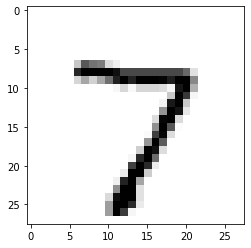

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
answer:  [7]


In [13]:
n=0
plt.imshow(x_test[n].reshape(28,28) , cmap="Greys", interpolation="nearest")
plt.show()
print("answer: ", model.predict_classes( x_test[n].reshape(1,28,28,1)) )

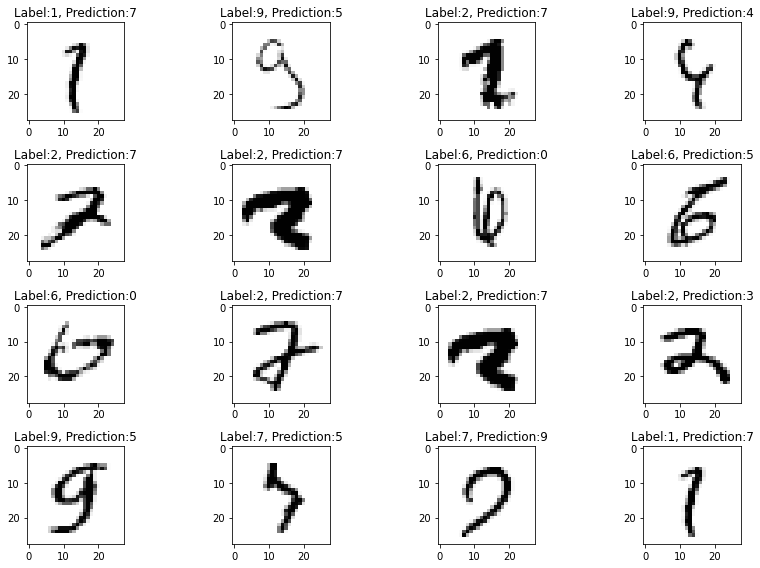

In [17]:
import random

predicted_result = model.predict(x_test) # [9.9003312e-15 2.3623783e-11 .... 1.0000000e+00 3.8261037e-14 8.4209018e-10]
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)
wrong_result=[]
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
        
samples = random.choices(population = wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()